# **TASK 1:**
# Pre-proceessing, Cleaning: 
## Load and analyze the data and decide on appropriate preprocessing steps (see exercises week 3-5). Please explain why you choose these specific preprocessing steps.


# **Import Needed libraries**



In [1]:
from asyncore import write
from dataclasses import replace
from itertools import count
from locale import normalize
from random import sample, shuffle
from turtle import width
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np

**Read the training Data**

In [3]:
data = pd.read_csv('/content/trainingdata.csv', index_col=0)
print(data.shape)
print(data.head(10))
data.describe().to_csv("Genes_statistics.csv")

(600, 5000)
                      gene_1     gene_2    gene_3     gene_4     gene_5  \
training_sample_1        NaN   9.925867       NaN  12.435052  13.139116   
training_sample_2        NaN   9.884897       NaN   7.256017  11.139180   
training_sample_3        NaN  10.248710       NaN   0.000000  12.029570   
training_sample_4        NaN   8.904325  7.552800  11.993353  11.623817   
training_sample_5        NaN   9.451238       NaN  15.285726        NaN   
training_sample_6        NaN  12.808827  7.370792   9.413968        NaN   
training_sample_7        NaN   8.796711  7.271715  16.699765  12.164260   
training_sample_8   0.724214   8.903623  6.422226  21.143579  11.877675   
training_sample_9        NaN   9.141543       NaN   4.683137  11.673247   
training_sample_10       NaN  12.074493       NaN   0.000000  11.306102   

                       gene_6     gene_7     gene_8     gene_9   gene_10  ...  \
training_sample_1         NaN  12.489272  12.250712        NaN  1.738876  ...   


**Read the Labels** **Data** 

In [4]:
labels = pd.read_csv('/content/traininglabels.csv', index_col=0)
print(labels.shape)
print(labels.head(10))

(600, 1)
                    x
training_sample_1   0
training_sample_2   0
training_sample_3   0
training_sample_4   1
training_sample_5   0
training_sample_6   0
training_sample_7   1
training_sample_8   0
training_sample_9   1
training_sample_10  0


**Rename (X) column to labels**

In [5]:
labels = labels['x']


# Data Preprocessing.

**A) Handling with Missing values (NANs).**



Indentification of % of NaNs in each gene(columns) & % in each sample (rows)

In [6]:
# Check NANs at gene level
percentage_na_genes = pd.DataFrame(((data.isna().sum()/data.shape[0])*100).sort_values(ascending=False),columns=['Percentage'])
print(percentage_na_genes)
# Check NANs at sample level
percentage_na_samples = pd.DataFrame(((data.isna().sum(axis = 1)/data.shape[1])*100).sort_values(ascending=False), columns=['Percentage'])
print(percentage_na_samples)

           Percentage
gene_3654       100.0
gene_1662       100.0
gene_1740       100.0
gene_4351       100.0
gene_544        100.0
...               ...
gene_1747         0.0
gene_1746         0.0
gene_1745         0.0
gene_1744         0.0
gene_5000         0.0

[5000 rows x 1 columns]
                     Percentage
training_sample_581        6.04
training_sample_53         6.00
training_sample_574        6.00
training_sample_552        5.94
training_sample_277        5.94
...                         ...
training_sample_160        5.08
training_sample_31         5.06
training_sample_448        5.06
training_sample_423        5.04
training_sample_425        5.02

[600 rows x 1 columns]


Visualization of NAN % across genes and samples via Histogram & density plot.

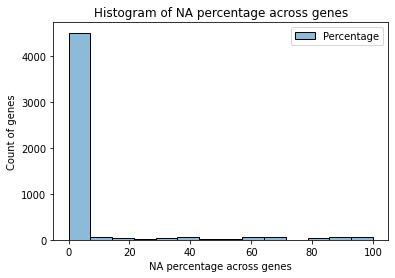

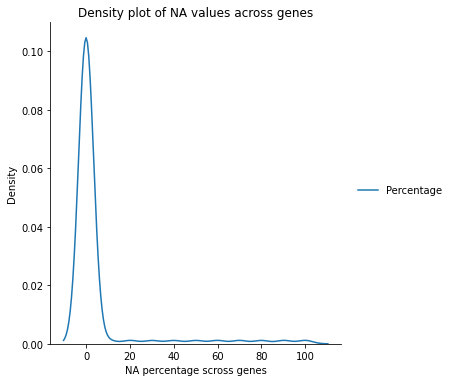

#####################
Most Genes contain less than 10% missing values
#####################


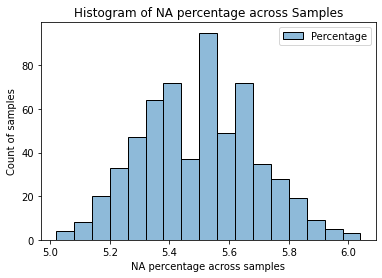

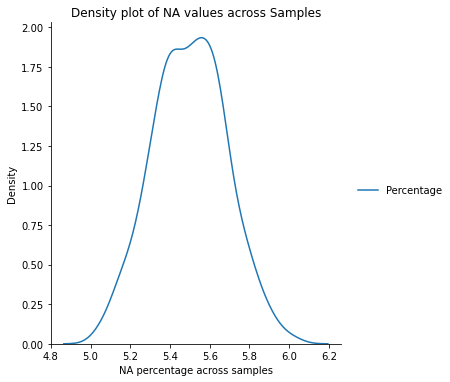

In [7]:
# genes
sns.histplot(percentage_na_genes)
plt.title("Histogram of NA percentage across genes")
plt.xlabel("NA percentage across genes")
plt.ylabel("Count of genes")
sns.displot(percentage_na_genes , kind = "kde")
plt.title("Density plot of NA values across genes")
plt.xlabel("NA percentage scross genes")
plt.show()
print("#####################")
print("Most Genes contain less than 10% missing values")
print("#####################")
# samples
sns.histplot(percentage_na_samples)
plt.title("Histogram of NA percentage across Samples")
plt.xlabel("NA percentage across samples")
plt.ylabel("Count of samples")
sns.displot(percentage_na_samples , kind = "kde")
plt.title("Density plot of NA values across Samples")
plt.xlabel("NA percentage across samples")
plt.show()



 % of genes having NANs more than 10%

In [8]:
print("Number of genes with > 10% NaN: " , len(percentage_na_genes[percentage_na_genes['Percentage']>10]), "genes") # 50 genes 100% NAs


Number of genes with > 10% NaN:  471 genes


**Manipulation of NANs across genes**

*   Removal of genes with NANs > 10%.
*   Visualization of distribution of NANs in filtered genes.



(600, 4529)


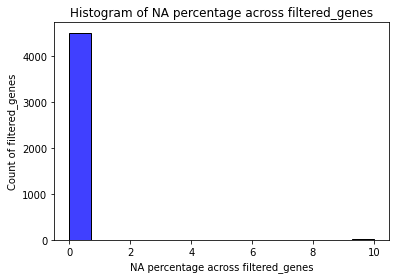

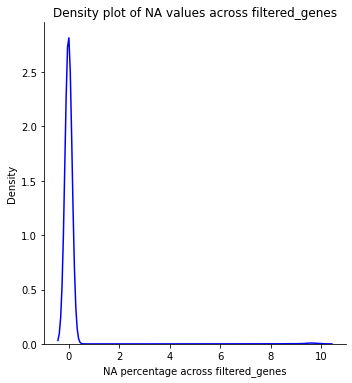

In [9]:
percentage_na_genes_high_na = percentage_na_genes[percentage_na_genes['Percentage']>10] 
data_filtered = data.drop(percentage_na_genes_high_na.index, axis=1)
print(data_filtered.shape)
sns.histplot((data_filtered.isna().sum()/data_filtered.shape[0])*100, color="blue")
plt.title("Histogram of NA percentage across filtered_genes")
plt.xlabel("NA percentage across filtered_genes")
plt.ylabel("Count of filtered_genes")
sns.displot((data_filtered.isna().sum()/data_filtered.shape[0])*100 , kind = "kde" , color ="blue")
plt.title("Density plot of NA values across filtered_genes")
plt.xlabel("NA percentage across filtered_genes")
plt.show()

**Manipulation of zero across genes**

*   Identify genes with uniform expression of zero across all samples.
*   Visualization of sum gene expression across samples.



gene_3898    0.0
gene_2347    0.0
gene_4007    0.0
gene_666     0.0
gene_4383    0.0
gene_4095    0.0
gene_3763    0.0
gene_3075    0.0
gene_2691    0.0
gene_1566    0.0
dtype: float64


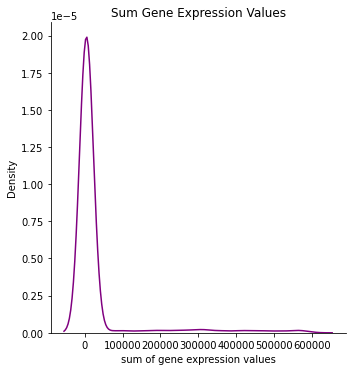

In [10]:
#identify genes with uniform expression of 0
genes_zeros = data_filtered.sum().sort_values()
print(genes_zeros.head(10))
#plottinh of sum gene expression across samples
sns.displot(genes_zeros , kind = "kde" , color ="purple")
plt.title("Sum Gene Expression Values")
plt.xlabel("sum of gene expression values")
plt.show()


**Remove genes with Zero Values across all samples.

In [11]:
data_filtered  = data_filtered.drop(genes_zeros[genes_zeros == 0].index, axis = 1)
print(data_filtered.shape)

(600, 4455)


**Data sepration into classes 0 & 1 for imputation with KNN **

In [12]:
"""
Impute NAs with KNN
"""
#Labels to be modified
class0 = labels[labels == 0].index
class1 = labels[labels == 1].index
#Classes Separation
data_filtered_class0 = data_filtered.loc[class0,:]
data_filtered_class1 = data_filtered.loc[class1,:]
print(data_filtered_class0.shape)
print(data_filtered_class1.shape)
#to arrange the labels in the same order as the training data
labels = [0]*len(class0)+[1]*len(class1)

(375, 4455)
(225, 4455)


**Visualization of class 0 & class 1 percentage**

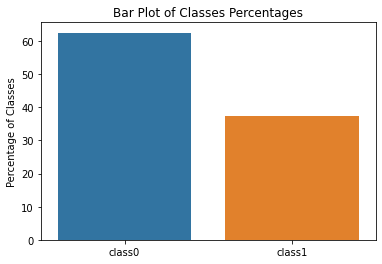

In [13]:
sns.barplot(x = ['class0' , 'class1'], y = [((len(class0)/data_filtered.shape[0])*100), ((len(class1)/data_filtered.shape[0])*100)])
plt.ylabel("Percentage of Classes")
plt.title("Bar Plot of Classes Percentages")
plt.show()

**Imputation of remaining NANs with K-Nearest Neighbor(KNN) Algorithm**

In [14]:
"""
KNN imputatiom
"""
#Impting NA Values with K nearest neighbors
from sklearn.impute import KNNImputer
imp_knn = KNNImputer(n_neighbors=5 , missing_values= np.nan)
#Imputing NA values in class0
data_imputed_class0 = imp_knn.fit_transform(data_filtered_class0)
data_imputed_class0 = pd.DataFrame(data_imputed_class0, columns=data_filtered_class0.columns,index=data_filtered_class0.index)
#Imputing NA values in class1
data_imputed_class1 = imp_knn.fit_transform(data_filtered_class1)
data_imputed_class1 = pd.DataFrame(data_imputed_class1, columns=data_filtered_class1.columns,index=data_filtered_class1.index)
#Merging the Data
data_imputed = data_imputed_class0.append(data_imputed_class1)
#Check for any remaining NAs
print(data_imputed.isna().sum())
print(set(data_imputed.isna().sum()))
print(data_imputed.shape)


gene_2       0
gene_4       0
gene_5       0
gene_7       0
gene_8       0
            ..
gene_4996    0
gene_4997    0
gene_4998    0
gene_4999    0
gene_5000    0
Length: 4455, dtype: int64
{0}
(600, 4455)


**Check genes duplications**

In [15]:
"""
check for duplication
"""
#If False there is no Duplication
print(set(data_imputed.transpose().duplicated()))
genes_duplicated = pd.DataFrame(data_imputed.transpose().duplicated(), columns = ['Bool'])
genes_duplicated[genes_duplicated['Bool']== False].index
print(set(data_imputed.duplicated()))

{False}
{False}


**Check for normality** by using:

* Shapiro-Wilk Test.  
*   Mann Whitney U Test (Wilcoxon Rank Sum Test).
*  kolmogrov smirnov. 
*  Anderson darling. 





In [15]:
"""
check for normality
"""
genes_table = pd.DataFrame()
#check for normality
from scipy.stats import shapiro, ranksums, kstest , anderson
from statsmodels.stats.diagnostic import normal_ad
data_type = data_imputed.copy()
for gene in data_type.columns:
    #With shapiro test
    genes_table.loc[gene,'shapiro_pvalue'] = shapiro(data_type.loc[:,gene])[1]
    if genes_table.loc[gene,'shapiro_pvalue'] > 0.05:
        genes_table.loc[gene, 'shapiro_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'shapiro_normal'] = 'not_normal'
    #with kolmogrov smirnov
    genes_table.loc[gene,'ktest_pvalue'] = kstest(data_type.loc[:,gene], 'norm').pvalue
    if genes_table.loc[gene,'ktest_pvalue'] > 0.05:
        genes_table.loc[gene, 'ktest_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'ktest_normal'] = 'not_normal'
    #with Anderson darling
    genes_table.loc[gene, 'Andersons_darling_pvalue'] = normal_ad(data_type.loc[:,gene])[1]
    if genes_table.loc[gene,'Andersons_darling_pvalue'] > 0.05:
        genes_table.loc[gene, 'Andersons_darling_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'Andersons_darling_normal'] = 'not_normal'
#Check for NAs as errors from the tests
print(genes_table.isna().sum())
print(genes_table.head(15))   

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


shapiro_pvalue              0
shapiro_normal              0
ktest_pvalue                0
ktest_normal                0
Andersons_darling_pvalue    0
Andersons_darling_normal    0
dtype: int64
         shapiro_pvalue shapiro_normal   ktest_pvalue ktest_normal  \
gene_2     1.653055e-15     not_normal   0.000000e+00   not_normal   
gene_4     2.473374e-05     not_normal   0.000000e+00   not_normal   
gene_5     4.215617e-02     not_normal   0.000000e+00   not_normal   
gene_7     1.585597e-01         normal   0.000000e+00   not_normal   
gene_8     6.495325e-01         normal   0.000000e+00   not_normal   
gene_10    2.857900e-16     not_normal  1.094375e-274   not_normal   
gene_11    2.406980e-15     not_normal   0.000000e+00   not_normal   
gene_12    1.298516e-01         normal   0.000000e+00   not_normal   
gene_13    3.923636e-44     not_normal  3.138914e-139   not_normal   
gene_14    9.100076e-03     not_normal   0.000000e+00   not_normal   
gene_15    4.878436e-15     not_norma

**Choice of  the best evaluator:**

Based on the previous outputs, we chose **Shapiro-Wilk** Test.

In [16]:
#Select one of the Below evaluators
evaluator = 'shapiro_normal'#'Andersons_darling_normal' #'ktest_normal'  #'shapiro_normal'

print(f"Normally Distributed Genes with {evaluator} : {len(genes_table[genes_table[evaluator]== 'normal'])} genes")
print(f"Not Normally Distributed Genes with {evaluator} : {len(genes_table[genes_table[evaluator]== 'not_normal'])} genes")


Normally Distributed Genes with shapiro_normal : 1972 genes
Not Normally Distributed Genes with shapiro_normal : 2483 genes


Visualization of genes distribution using **Shapiro-Wilk** Test.

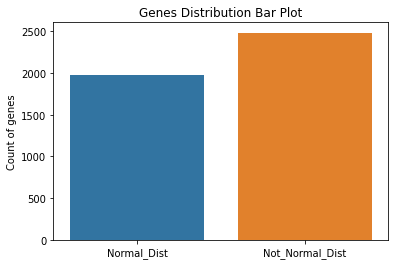

In [17]:
sns.barplot(x = ["Normal_Dist","Not_Normal_Dist"] 
            , y = [len(genes_table[genes_table[evaluator]== 'normal']),len(genes_table[genes_table[evaluator]== 'not_normal'])])
plt.ylabel("Count of genes")
plt.title("Genes Distribution Bar Plot")
plt.show()

**Detection of outliers in imputed data**

In [16]:
"""
Outliers Detection
"""
#Function to detect outliers from a vector
def Outlier_func(vector):
  outliers = []
  vector = sorted(vector)
  q1, q3= np.percentile(vector,[15,85])
  iqr = q3 - q1
  lower_bound = q1 -(1.5 * iqr) 
  upper_bound = q3 +(1.5 * iqr)
  for value in vector:
    if value < lower_bound:
      outliers.append(value)
    elif value > upper_bound:
      outliers.append(value)
  return outliers

In [17]:
#outliers in the data imputed
outliers = {}
genes_names = []
len_outliers =[]
for gene in data_imputed.columns:
  outliers[f'{gene}_Outlier'] = Outlier_func(data_imputed.loc[:,gene])
  if len(Outlier_func(data_imputed.loc[:,gene])) != 0:
    genes_names.append(gene)
    len_outliers.append(len(Outlier_func(data_imputed.loc[:,gene])))

genes_names = pd.DataFrame(index = genes_names)
genes_names['count_of_outliers'] = len_outliers
genes_names = genes_names.sort_values('count_of_outliers', ascending = False)
print(genes_names.head(20))

           count_of_outliers
gene_2270                 86
gene_1433                 83
gene_1685                 77
gene_776                  75
gene_199                  70
gene_4870                 69
gene_4532                 67
gene_1032                 66
gene_1751                 65
gene_3305                 63
gene_278                  61
gene_13                   57
gene_1358                 57
gene_1843                 56
gene_4402                 53
gene_2803                 52
gene_3307                 49
gene_2848                 48
gene_339                  45
gene_4174                 42


Plotting of outliers distributions across  five genes(for example).

gene_2270
gene_1433
gene_1685
gene_776
gene_199


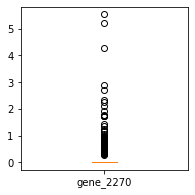

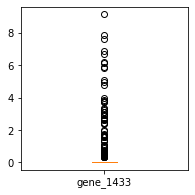

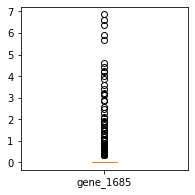

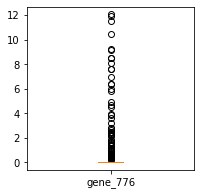

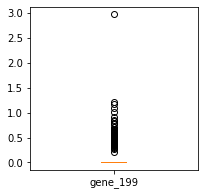

In [18]:
n_genes = 5
genes_outliers_list = genes_names.head(n_genes).index
box_plots_dict = {}
for gene in genes_outliers_list:
  print(gene)
  box_plots_dict[f'{gene}'] = {f'{gene}': data_imputed.loc[:,gene]}
  fig, ax = plt.subplots(figsize = (3,3))
  ax.boxplot(box_plots_dict[f'{gene}'].values())
  ax.set_xticklabels(box_plots_dict[f'{gene}'].keys())
plt.show()

**Hint:**Majority of genes including outliers showed high ratio of zero vlaues. 

Visualization of outliers per genes via Histogram & density plot.

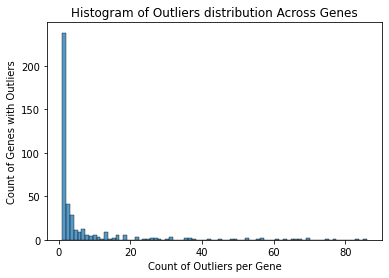

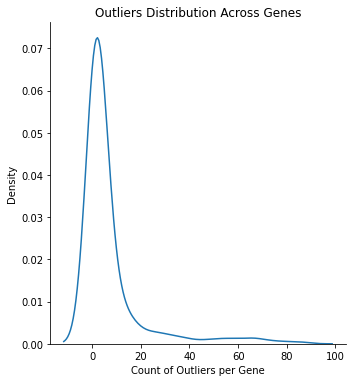

In [21]:
sns.histplot(len_outliers)
plt.xlabel("Count of Outliers per Gene")
plt.ylabel("Count of Genes with Outliers")
plt.title("Histogram of Outliers distribution Across Genes")
plt.show()

sns.displot(len_outliers , kind = "kde")
plt.xlabel("Count of Outliers per Gene")
plt.title("Outliers Distribution Across Genes")
plt.show()

## **Removal of Genes with more than 10 Outliers**:
Based on distribution of outliers per genes,we found that the  majority of genes have outliers > 10. Consequently, we decided to remove them.

In [19]:
#Removal of Genes with more than 10 Outliers
data_imputed = data_imputed.drop(genes_names[genes_names.iloc[:,0]>=10].index, axis = 1)
print(len(genes_names[genes_names.iloc[:,0]>=10]))
print(data_imputed.shape)

72
(600, 4383)


In [23]:
data_imputed.to_csv("data_imputed.csv")

**Data Transformation**:

 To improve the performance of our predictive model, we applied the normalization algorithm using Log transformation.
 It is a data transformation method in which it replaces each variable x with a log(x)

In [29]:
for col in data_imputed.columns:
    data_imputed[col] = data_imputed[col].apply(lambda x: np.log2(x + 1))

In [30]:
data_scaled = data_imputed.copy()

In [26]:
print(data_imputed.head(10))
print(data_imputed.index)

                      gene_2    gene_4    gene_5    gene_7    gene_8  \
training_sample_1   3.449676  3.747930  3.821620  3.753741  3.727998   
training_sample_2   3.444256  3.045446  3.601599  4.396546  4.410706   
training_sample_3   3.491688  0.000000  3.703718  4.359041  4.149762   
training_sample_5   3.385602  4.025536  3.746226  3.284151  4.433325   
training_sample_6   3.787519  3.380448  3.639605  3.789618  4.324662   
training_sample_8   3.307956  4.468816  3.686800  4.321656  3.436802   
training_sample_10  3.708683  0.000000  3.621302  4.411680  3.712558   
training_sample_14  3.516803  4.035284  3.671059  4.728945  4.275266   
training_sample_15  3.750143  0.000000  3.682279  3.444000  4.045425   
training_sample_16  3.373728  4.253970  3.867377  3.786568  4.042340   

                     gene_10   gene_11   gene_12   gene_14   gene_15  ...  \
training_sample_1   1.453584  3.844001  3.444419  4.324476  4.234065  ...   
training_sample_2   3.001847  4.274576  3.042675  3.6

**Plotting means of gene expression before & after log scaling**:

To ensure that the log function worked in a good manner.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


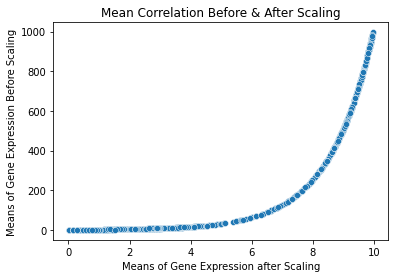

In [27]:
#Plotting of the new means
sns.scatterplot(data_scaled.sort_index().mean(),data.loc[:,data_scaled.columns].sort_index().mean())
plt.xlabel("Means of Gene Expression after Scaling")
plt.ylabel("Means of Gene Expression Before Scaling")
plt.title("Mean Correlation Before & After Scaling")
plt.show()

**Check for data normality after log transformation**

In [28]:
"""
check for normality
"""
genes_table = pd.DataFrame()
#check for normality
data_type = data_scaled.copy()
from scipy.stats import shapiro, ranksums, kstest , anderson
from statsmodels.stats.diagnostic import normal_ad

for gene in data_type.columns:
    #With shapiro test
    genes_table.loc[gene,'shapiro_pvalue'] = shapiro(data_type.loc[:,gene])[1]
    if genes_table.loc[gene,'shapiro_pvalue'] > 0.05:
        genes_table.loc[gene, 'shapiro_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'shapiro_normal'] = 'not_normal'
    #with kolmogrov smirnov
    genes_table.loc[gene,'ktest_pvalue'] = kstest(data_type.loc[:,gene], 'norm').pvalue
    if genes_table.loc[gene,'ktest_pvalue'] > 0.05:
        genes_table.loc[gene, 'ktest_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'ktest_normal'] = 'not_normal'
    #with Anderson darling
    genes_table.loc[gene, 'Andersons_darling_pvalue'] = normal_ad(data_type.loc[:,gene])[1]
    if genes_table.loc[gene,'Andersons_darling_pvalue'] > 0.05:
        genes_table.loc[gene, 'Andersons_darling_normal'] = 'normal'
    else:
        genes_table.loc[gene, 'Andersons_darling_normal'] = 'not_normal'

genes_table.isna().sum()
print(genes_table.head(10))

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


         shapiro_pvalue shapiro_normal   ktest_pvalue ktest_normal  \
gene_2     2.079426e-12     not_normal   0.000000e+00   not_normal   
gene_4     7.737630e-23     not_normal   0.000000e+00   not_normal   
gene_5     2.926898e-01         normal   0.000000e+00   not_normal   
gene_7     1.398773e-14     not_normal   0.000000e+00   not_normal   
gene_8     1.244908e-13     not_normal   0.000000e+00   not_normal   
gene_10    5.738180e-19     not_normal  7.978906e-246   not_normal   
gene_11    1.083054e-21     not_normal  5.311241e-317   not_normal   
gene_12    7.711240e-12     not_normal   0.000000e+00   not_normal   
gene_14    7.438640e-20     not_normal   0.000000e+00   not_normal   
gene_15    9.289062e-23     not_normal   0.000000e+00   not_normal   

         Andersons_darling_pvalue Andersons_darling_normal  
gene_2               6.910075e-21               not_normal  
gene_4               0.000000e+00               not_normal  
gene_5               1.534860e-01             

**Choice of the best evaluator of genes distribution: **

Based on the previous outputs, we chose Shapiro-Wilk Test.

In [29]:
evaluator = 'shapiro_normal'#'Andersons_darling_normal' #'ktest_normal'  #'shapiro_normal'

print(f"normally distributed genes according to {evaluator} = "   , len(genes_table[genes_table[evaluator]== 'normal']))
print(f"not normally distributed genes according to {evaluator} = "   ,  len(genes_table[genes_table[evaluator]== 'not_normal']))

normally distributed genes according to shapiro_normal =  1013
not normally distributed genes according to shapiro_normal =  3370


Visualization of genes distribution using **Shapiro-Wilk \**Test.

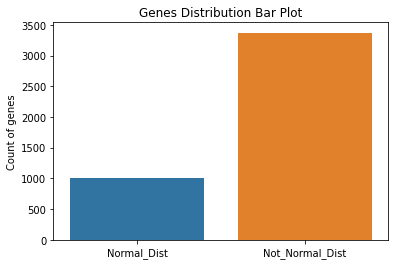

In [31]:
sns.barplot(x = ["Normal_Dist","Not_Normal_Dist"] 
            , y = [len(genes_table[genes_table[evaluator]== 'normal']),len(genes_table[genes_table[evaluator]== 'not_normal'])])
plt.ylabel("Count of genes")
plt.title("Genes Distribution Bar Plot")
plt.show()

# **# Task 2: Classifier and Quality Measure Selection**
a) Select at least two classifiers to solve the classification task at hand. Motivate the choice of your classifiers (e.g. complexity, performance, interpretability).

b) Select at least two quality measures to evaluate model performance and justify your choice (Lectures 6 and 8).

a) Select at least two classifiers to solve the classification task at hand. 
 We  had  Labeled Data so we needed to  follow Classification Approach and its algorithms.
We chose three classifiers:
1.   Support Vector Machine (SVM).
 

*   SVM's are fast when it comes to classifying since they only need to determine which side of the "line" your data is on.
*   SVMs can handle complex non-linear classification. 
* As the data was not linear so we used of kernal trick.  

2.  k-nearest neighbors algorithm.
KNN models are easy to implement and handle non-linearities well. 
Fitting the model also tends to be quick: the computer doesn’t have to calculate any particular parameters or values, after all. 

3.  Decision tree.
Regression models fail in situations where the relationship between features and outcome is nonlinear or where features interact with each other.
 
The data ends up in distinct groups that are often easier to understand than points on a multi-dimensional hyperplane as in linear regression. The interpretation is arguably pretty simple.
A decision tree works equally well with any monotonic transformation of a feature.

 



**b) Select at least two quality measures to evaluate model performance and justify your choice.**


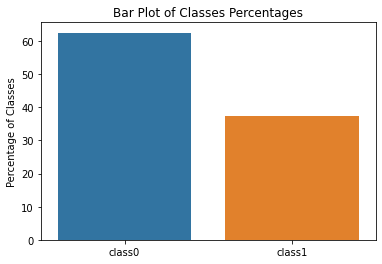

In [32]:
sns.barplot(x = ['class0' , 'class1'], y = [((len(class0)/data_filtered.shape[0])*100), ((len(class1)/data_filtered.shape[0])*100)])
plt.ylabel("Percentage of Classes")
plt.title("Bar Plot of Classes Percentages")
plt.show()

Because the data is mild unbalanced data, we needed to decide which class is most important.
Based on our point of view , we were interested in the importance of class 1. As class 1 labeled data is less than class zero, so we decided to choose the **precision**  as it  quantifies the number of correct positive predictions made.

**Precision **= TruePositives / (TruePositives + FalsePositives)

On the other side it was impportant to choose **MCC** in evaluating model performance.

**MCC **= (TP*TN – FP*FN) / √(TP+FP)(TP+FN)(TN+FP)(TN+FN)




# **# Task 3: Parameter Tuning and Validation**

a) Carefully choose the set of parameters of the selected classifiers.

b) Decide for a validation strategy (e.g. Hold-out, Cross Validation, Monte Carlo Validation, see Lecture 8), carefully select the ratios between training and validation, number of folds, or percentage of data (e.g. 7:3, 8:2, 9:1) and justify your decision.

c) Use the validation strategy to evaluate the chosen range of parameters. Create a plot depicting the relation between parameter range and quality measures. Use the plot to find the optimal set of parameters for each method. Discuss what the best parameters are and how these were chosen.

d) Plot a ROC curve for the best performing models





In [33]:
"""
Parameter Selection
"""
X = np.array(data_scaled)
y = np.array(labels)
print(X.shape)
print(y.shape)

(600, 4383)
(600,)


As the data was not very large so we decided not to use Hold-out validation.
We chose the **cross validation** as our validation strategy

*   It is a popular method because it is simple to understand and because it 
    generally results in a less biased or less optimistic estimate of the       model  skill than other methods, such as a simple train/test split.

*  There is a bias-variance trade-off associated with the choice of k in k-fold cross-validation. Typically, given these considerations, one performs k-fold cross-validation using k = 5 , as this  value has been shown empirically to yield test error rate estimates that suffer neither from excessively high bias nor from very high variance. 





In [34]:
"""
GridSearch
"""
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.model_selection import StratifiedKFold
CV= 5

# The set of parameters chosen for the selected classifier:

1) Support Vector Machine parameters are:
 * kernal:It transforms data into another dimension so that the data can be classified.
 *  Dgree : reflects the level of complexcity in model. WE chose small range in order not to make overfitting.
 *  Gamma is  one of the hyper-parameters that decide the performance of an SVM  model. There should be a fine balance between Variance and Bias for any ML  model. 






In [35]:
#Support Vector Machine
from sklearn.svm import SVC
Supp_para = { 'kernel': ['linear','poly', 'rbf'],
            'degree': np.arange(2,5),
            'gamma': ['scale', 'auto']}

c) **Use the validation strategy to evaluate the chosen range of parameters. Create a plot depicting the relation between parameter range and quality measures. Use the plot to find the optimal set of parameters for each method. Discuss what the best parameters are and how these were chosen.**

For SVM
* We used CV to evaluate the parameters. 

In [36]:
#One metric
Supp_gscv = GridSearchCV(SVC(), Supp_para, cv =CV , scoring = make_scorer(average_precision_score))
Supp_gscv.fit(X , y)
Supp_gscv.best_params_
Supp_gscv.best_score_
Supp_gscv.cv_results_.keys()
Supp_gscv.cv_results_['params']
Supp_gscv.cv_results_['mean_test_score']


array([0.95658866, 0.96093434, 0.52777778, 0.95658866, 0.95658866,
       0.90277778, 0.95658866, 0.95658866, 0.52777778, 0.95658866,
       0.95658866, 0.90277778, 0.95658866, 0.95815657, 0.52777778,
       0.95658866, 0.95815657, 0.90277778])

 ** plot depicting the relation between parameter range and quality measures**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


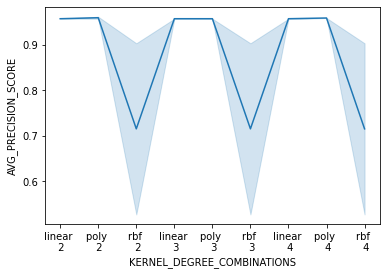

In [37]:
plotting_comb = []
for i in range(0 , len(Supp_gscv.cv_results_['params'])):
    plotting_comb.append(f"{Supp_gscv.cv_results_['params'][i][list(Supp_para.keys())[0]]} \n {Supp_gscv.cv_results_['params'][i][list(Supp_para.keys())[1]]}")
sns.lineplot(plotting_comb, Supp_gscv.cv_results_['mean_test_score'])
plt.xticks()
plt.ylabel("Avg_Precision_score".upper())
plt.xlabel(f"{list(Supp_para.keys())[0]}_{list(Supp_para.keys())[1]}_COMBINATIONS".upper())
plt.show()

**The optimal set of parameters for SVM.**

In [38]:
print(Supp_gscv.best_params_)
print(Supp_gscv.best_score_)

{'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
0.9609343434343435


**2) Decision tree Machine parameters are:**
* min_samples_split specifies the minimum number of samples required to split an internal node. The range was small in order not to increase complexcity and hence overfitting.
* gini impurity measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled.
* Entropy is a measure of information that indicates the disorder of the features with the target. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy. 

* Note: Entropy is a measure of information that indicates the disorder of the features with the target. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy. 



For Decision tree:

We used CV to evaluate the parameters.

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree_para = {'criterion':['gini','entropy'],
             'min_samples_split': np.arange(2,6)}

In [40]:
#One metric 
dtree_gscv = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=CV, scoring = make_scorer(average_precision_score))
dtree_gscv.fit(X, y)
dtree_gscv.best_params_
dtree_gscv.best_score_

0.8771545644059968

The optimal set of parameters for Decision tree.

In [41]:
print(dtree_gscv.best_params_)
print(dtree_gscv.best_score_)

{'criterion': 'entropy', 'min_samples_split': 2}
0.8771545644059968


 plot depicting the relation between parameter range and quality measures** 





/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


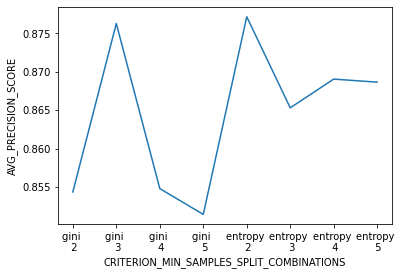

In [42]:
plotting_comb = []
for i in range(0 , len(dtree_gscv.cv_results_['params'])):
    plotting_comb.append(f"{dtree_gscv.cv_results_['params'][i][list(tree_para.keys())[0]]} \n {dtree_gscv.cv_results_['params'][i][list(tree_para.keys())[1]]}")
sns.lineplot(plotting_comb, dtree_gscv.cv_results_['mean_test_score'])
plt.xticks()
plt.ylabel("Avg_Precision_score".upper())
plt.xlabel(f"{list(tree_para.keys())[0]}_{list(tree_para.keys())[1]}_COMBINATIONS".upper())
plt.show()


**3) KNN parameters:**
* n_neighbours: The number of neighbors is the core deciding factor.
* Weights : It is a function defined the K- neighbors.

For KNN:

We used CV to evaluate the parameters.

In [43]:
'''
K nearest neighbours grid search for best parameters
'''
from sklearn.neighbors import KNeighborsClassifier
KNN_para = {'n_neighbors': np.arange(5,10),
            'weights':['uniform', 'distance']}

plot depicting the relation between parameter range and quality measures**

In [44]:
#One metric
KNN_gscv = GridSearchCV(KNeighborsClassifier(), KNN_para , cv = CV , scoring = make_scorer(average_precision_score))
KNN_gscv.fit(X,y)
KNN_gscv.best_params_
KNN_gscv.best_score_
KNN_gscv.cv_results_.keys()
KNN_gscv.cv_results_['params']
KNN_gscv.cv_results_['mean_test_score']

array([0.71251684, 0.71251684, 0.6989645 , 0.74131796, 0.75683923,
       0.75683923, 0.74017665, 0.79980019, 0.81116278, 0.81116278])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


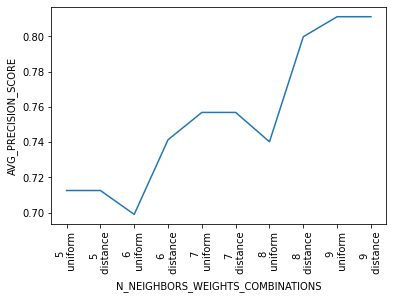

In [45]:
plotting_comb = []
for i in range(0 , len(KNN_gscv.cv_results_['params'])):
    plotting_comb.append(f"{KNN_gscv.cv_results_['params'][i][list(KNN_para.keys())[0]]} \n {KNN_gscv.cv_results_['params'][i][list(KNN_para.keys())[1]]}")
sns.lineplot(plotting_comb, KNN_gscv.cv_results_['mean_test_score'])
plt.xticks(rotation = 90)
plt.ylabel("Avg_Precision_score".upper())
plt.xlabel(f"{list(KNN_para.keys())[0]}_{list(KNN_para.keys())[1]}_COMBINATIONS".upper())
plt.show()

The optimal set of parameters for KNN.

In [46]:
print(KNN_gscv.best_params_)
KNN_gscv.best_score_

{'n_neighbors': 9, 'weights': 'uniform'}


0.8111627806890965

# ****
#  Task 5: Model interpretation and feature importance
a) Depending on our  model, we chose
*   Variance.
*   Wilcoxon.
*   Correlation.



In [47]:
"""
Feature Importance
"""
genes_importance = pd.DataFrame(index = data_imputed.columns)


In [48]:
"""
Calculating genes variance after scaling
"""
variance_list = []
for gene in data_imputed.columns:
    variance_list.append(np.var(data_imputed.loc[:,gene]))

genes_importance['var_scaled'] = variance_list


# Task 5: Model interpretation and feature importance

b) Identify the 10 most informative features for your model and visualize them in a bar plot sorted by their importance.

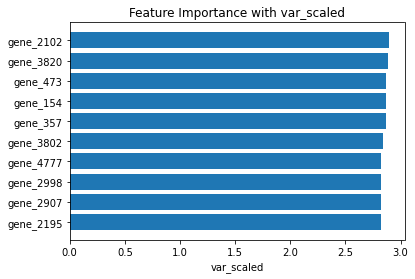

In [49]:
sorting_value = 'var_scaled'
plotting_gene_importance = pd.DataFrame(genes_importance.sort_values(sorting_value, ascending = False).head(10)[sorting_value])
plt.barh(y=plotting_gene_importance.index, width =plotting_gene_importance.iloc[:,0])
plt.title(f"Feature Importance with {sorting_value}")
plt.xlabel(sorting_value)
plt.gca().invert_yaxis()
plt.show()

In [50]:
#wilcoxon sum rank test
from scipy.stats import ranksums
df0 = data_scaled.loc[class0,:]
df1 = data_scaled.loc[class1,:]

for gene in data_imputed.columns:
    genes_importance.loc[gene,'rank_sum_statistic'] = ranksums(df0[gene], df1[gene])[0]
    genes_importance.loc[gene,'rank_sum_p_value'] = ranksums(df0[gene], df1[gene])[1]

len(genes_importance[genes_importance['rank_sum_p_value']<0.05])
len(genes_importance[genes_importance['rank_sum_p_value']>0.05])

3382

In [51]:
sorted_importance_RS = genes_importance[genes_importance['rank_sum_p_value']<0.05]
sorted_importance_RS.index
sorted_importance_RS = genes_importance.loc[sorted_importance_RS.index,'rank_sum_statistic']
sorted_importance_RS = sorted_importance_RS.sort_values(ascending = False)

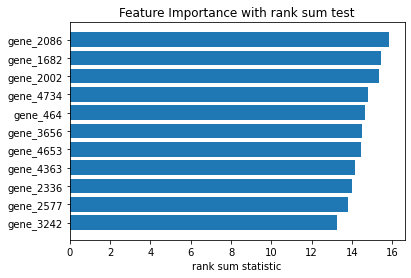

In [52]:
plt.barh(y=sorted_importance_RS.index[0:11], width =sorted_importance_RS.values[0:11])
plt.title("Feature Importance with rank sum test")
plt.xlabel("rank sum statistic")
plt.gca().invert_yaxis()
plt.show()

In [53]:
#Correlation with outcome
for gene in data_imputed.columns:
    df = pd.DataFrame(data_imputed.loc[:,gene])
    df['labels'] = labels
    genes_importance.loc[gene, 'Pearsons_correlation'] =  df.corr().iloc[1,0]
    genes_importance.loc[gene, 'Abs_Pearsons_correlation'] = abs(df.corr().iloc[1,0])

In [54]:
sorted_importance_Corr = genes_importance.loc[:,'Pearsons_correlation'].sort_values(ascending=False)

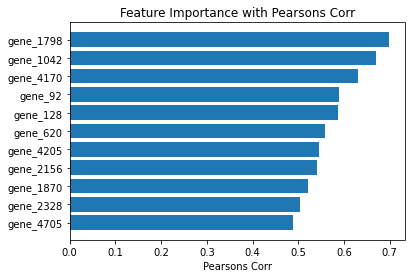

In [55]:
plt.barh(y=sorted_importance_Corr.index[0:11], width =sorted_importance_Corr.values[0:11])
plt.title("Feature Importance with Pearsons Corr")
plt.xlabel("Pearsons Corr")
plt.gca().invert_yaxis()
plt.show()

# **Task 4: Model Training**

a) Select one classifier/ model that is most generalizable and will perform best on the external test set.


In [56]:
"""
Training the models
"""
X = np.array(data_scaled)
y = np.array(labels)
print(X.shape)
print(y.shape)
#Generating the models
mcc_dtree = []
mcc_SV = []
mcc_KNN = []

precision_dtree = []
precision_SV = []
precision_KNN = []

(600, 4383)
(600,)


**Plot a ROC curve for the best performing Decision tree.**

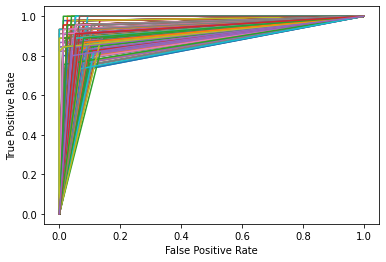

In [ ]:
for i in range(1,100):
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits = 5 , shuffle= True , random_state= i)
    for train , test in skf.split(X , y):
        X_train , X_test = X[train] , X[test]
        y_train , y_test = y[train] , y[test]
        
        #Decision tree
        from sklearn.tree import DecisionTreeClassifier
        tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        y_pred_proba = tree.predict_proba(X_test)
        precision_dtree.append(precision_score(y_test, y_pred))
        mcc_dtree.append(matthews_corrcoef(y_test, y_pred))
        fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba[:,1])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.plot(fpr , tpr)

In [ ]:
np.mean(precision_dtree)

0.9079197968922915

In [ ]:
np.mean(mcc_dtree)

0.8349001410516778

**Plot a ROC curve for the best performing models for Support Vector Machine**

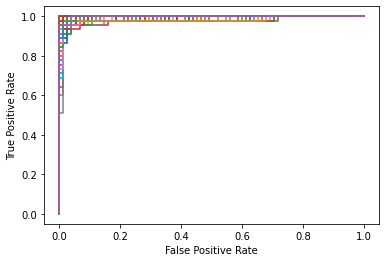

In [ ]:
for i in range(1,100):
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits = 5 , shuffle= True , random_state= i)
    for train , test in skf.split(X , y):
        X_train , X_test = X[train] , X[test]
        y_train , y_test = y[train] , y[test]
        from sklearn.svm import SVC
        SV = SVC(degree = 2 , gamma = 'scale', kernel ='poly', probability=True)
        SV.fit(X_train , y_train)
        y_pred = SV.predict(X_test)
        y_pred_proba = SV.predict_proba(X_test)
        precision_SV.append(precision_score(y_test , y_pred))
        mcc_SV.append(matthews_corrcoef(y_test, y_pred))
        fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba[:,1])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.plot(fpr , tpr)

In [ ]:
print(np.mean(mcc_SV))
print(np.mean(precision_SV))

0.9560236828220954
0.9841956608299143


**Plot a ROC curve for the best performing models for KNN**

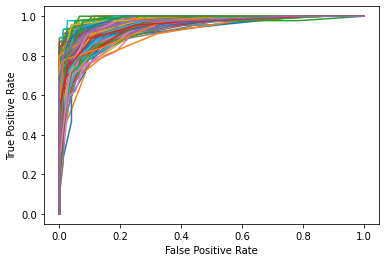

In [ ]:
#K nearest neighbour
for i in range(1,100):
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits = 5 , shuffle= True , random_state= i)
    for train , test in skf.split(X , y):
        X_train , X_test = X[train] , X[test]
        y_train , y_test = y[train] , y[test]
        from sklearn.neighbors import KNeighborsClassifier
        KNN = KNeighborsClassifier(n_neighbors=9 , weights = 'uniform')
        KNN.fit(X_train , y_train)
        y_pred = KNN.predict(X_test)
        y_pred_proba = KNN.predict_proba(X_test)
        precision_KNN.append(precision_score(y_test , y_pred))
        mcc_KNN.append(matthews_corrcoef(y_test, y_pred))
        fpr , tpr , thresholds = roc_curve(y_test , y_pred_proba[:,1])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.plot(fpr , tpr)

In [ ]:
print(np.mean(mcc_KNN))
print(np.mean(precision_KNN))

0.8114913449675857
0.9813898639924404


# **Task 4: Model Training**
b) With chosen classifiers and optimal parameters, train your model with data (training data).

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


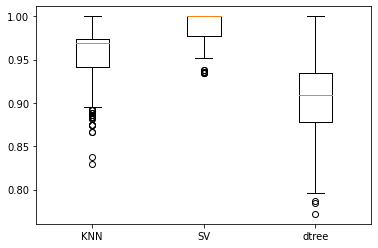

In [ ]:
box_plots_f1 = {'KNN': precision_KNN, 
                'SV': precision_SV,
                'dtree': precision_dtree 
                }
parameter_to_plot = box_plots_f1
fig, ax = plt.subplots()
ax.boxplot(parameter_to_plot.values())
ax.set_xticklabels(parameter_to_plot.keys())
plt.show()

Hint: Decision tree aligoithm has the highest variance.

SVM has the highest precision but it may be overfitting.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


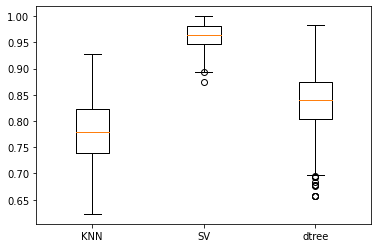

In [ ]:
box_plots_mcc = {'KNN': mcc_KNN, 
                        'SV': mcc_SV,
                        'dtree': mcc_dtree
                        }
parameter_to_plot = box_plots_mcc
fig, ax = plt.subplots()
ax.boxplot(parameter_to_plot.values())
ax.set_xticklabels(parameter_to_plot.keys())
plt.show()

The highest mcc related to Support Vector Machine model.

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dtree.fit(data_scaled, labels)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9 , weights = 'uniform')
KNN.fit(data_scaled, labels)

KNeighborsClassifier(n_neighbors=9)

In [33]:
from sklearn.svm import SVC
SV = SVC(degree = 2 , gamma = 'scale', kernel ='poly', probability=True)
SV.fit(data_scaled,labels)

SVC(degree=2, kernel='poly', probability=True)

In [21]:
X_validator = pd.read_csv("/content/testdata.csv",index_col=0)
X_validator_copy = X_validator.copy()
y_validator = pd.read_csv("/content/testlabels.csv",index_col=0)
data_imputed = pd.read_csv("/content/data_imputed.csv",index_col=0)



# Task 6: External Testing Code
a) Load external test dataset stored in the following two files: “testdata.csv” and “testlabels.csv”. Both will have the same format as the given dataset. At the time of testing, we will copy these into your collaborative file and run your test code.

b) Prepare code for your classifier to be applied to the loaded data and labels. Note: If you selected a set of features for your finale model, please make sure that you also reduce the test dataset to those features.

c) Store the predicted labels in a vector named “finaltest_pred” (see Exercise week 10).

d) Store the predicted probabilities in a vector named “finaltest_prob” (see Exercise week 10).

In [22]:
"""
Testing Validator
"""
#Filtering Features
X_validator = X_validator.loc[:,data_imputed.columns]
y_validator = y_validator['x']

In [23]:
y_validator.shape

(50,)

In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
X_validator = imputer.fit_transform(X_validator)

In [25]:
X_validator = pd.DataFrame(X_validator , columns = data_imputed.columns , index = X_validator_copy.index)


In [26]:
for col in X_validator.columns:
    X_validator[col] = X_validator[col].apply(lambda x: np.log2(x + 1))

In [35]:
from sklearn.metrics import *

In [47]:
finaltest_pred = SV.predict(X_validator)
finalest_prob = SV.predict_proba(X_validator)[:,1]
print("precision_score of Support Vector Model",precision_score(y_validator , finaltest_pred))
print("f1_score of Support Vector Model", f1_score(y_validator , finaltest_pred))
print("matthews_corrcoef of Support Vector Model", matthews_corrcoef(y_validator, finaltest_pred))


precision_score of Support Vector Model 1.0
f1_score of Support Vector Model 1.0
matthews_corrcoef of Support Vector Model 1.0


In [48]:
roc_auc_score(y_validator, finalest_prob)

1.0

In [45]:
finaltest_pred = KNN.predict(X_validator)
finalest_prob = KNN.predict_proba(X_validator)[:,1]
print("precision_score of K-nearest neighbors",precision_score(y_validator , finaltest_pred))
print("f1_score of K-nearest neighbors",f1_score(y_validator , finaltest_pred))
print("matthews_corrcoef of K-nearest neighbors",matthews_corrcoef(y_validator, finaltest_pred))


precision_score of K-nearest neighbors 1.0
f1_score of K-nearest neighbors 0.9473684210526316
matthews_corrcoef of K-nearest neighbors 0.9185586535436917


In [46]:
roc_auc_score(y_validator, finalest_prob)

0.9866666666666666

In [49]:
finaltest_pred = dtree.predict(X_validator)
finalest_prob = dtree.predict_proba(X_validator)[:,1]
print(precision_score(y_validator , finaltest_pred))
print(f1_score(y_validator , finaltest_pred))
print(matthews_corrcoef(y_validator, finaltest_pred))


1.0
1.0
1.0


In [50]:
roc_auc_score(y_validator, finalest_prob)

1.0

# Extra data visualization

**Principal component analysis (PCA):**

It was used to reduce dimensionality and remove noise by reducing a large number of features to just a couple of principal components

In [69]:
data_imputed = pd.read_csv("/content/data_imputed.csv", index_col=0)


In [70]:
"""
Standerdization
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy =True)
data_scaled = scaler.fit_transform(data_imputed)
data_scaled = pd.DataFrame(data_scaled , columns = data_imputed.columns , index = data_imputed.index)


In [71]:
"""
PCA
"""
from sklearn import decomposition

X = data_scaled.copy()
n_PCAs = 50
pca = decomposition.PCA(n_components=n_PCAs)
pca.fit(X)
X = pca.transform(X)

print(X.shape)
print(pca.explained_variance_ratio_)
print(pca.components_.shape)

(600, 50)
[0.01966841 0.01623867 0.01483432 0.01014596 0.00851138 0.005691
 0.00521527 0.0050773  0.00419469 0.0038935  0.00338326 0.00323089
 0.00312405 0.00306216 0.00297592 0.00290286 0.00287956 0.00284121
 0.00282997 0.00281548 0.00279833 0.00277447 0.00276176 0.0027556
 0.002736   0.00271943 0.00269773 0.0026824  0.00267765 0.00266077
 0.00264136 0.00261558 0.0026014  0.00259445 0.00258701 0.00256471
 0.00255463 0.00254687 0.00252578 0.00252176 0.00251396 0.00250975
 0.00249064 0.00248184 0.00246376 0.00245165 0.00244361 0.0024338
 0.00242568 0.0024087 ]
(50, 4383)


#Elbow plot repesenting variance **ratio** 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


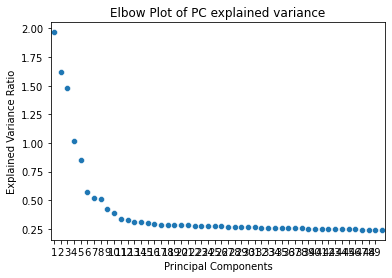

In [72]:
#Elbow plot for explained variance ratio
sns.scatterplot(np.arange(1,len(pca.explained_variance_)+1) , pca.explained_variance_ratio_*100)
plt.xticks(np.arange(1, n_PCAs, 1))
plt.xlim(0.5,n_PCAs+0.5)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Elbow Plot of PC explained variance")
plt.show()

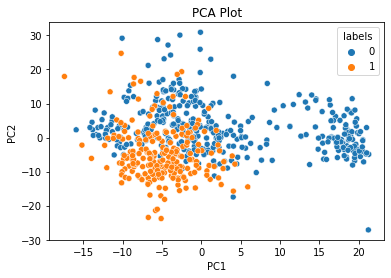

In [73]:
X = pd.DataFrame(X)
X['labels'] = labels
#Scatter Plot between PC1 & PC2
sns.scatterplot(data=X,x=X.iloc[:,0],y=X.iloc[:,1], hue = 'labels')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot")
plt.show()

Dimenstionality reduction with -distributed stochastic neighbor embedding ** (t-SNE) **

t-SNE is a non-linear dimensionality reduction algorithm finds patterns in the data by identifying observed clusters based on similarity of data points with multiple features.

In [74]:
"""
T-SNE
"""
from sklearn.manifold import TSNE
#Dimentionality reduction with t-SNE
reducer = TSNE()
TSNE_projections = reducer.fit_transform(data_scaled)
TSNE_projections = pd.DataFrame(TSNE_projections , index = data_scaled.index)
TSNE_projections['labels'] = labels
print(TSNE_projections.shape)
print(TSNE_projections.head(10))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(600, 3)
                            0          1  labels
training_sample_1   11.203695  -0.708754       0
training_sample_2   -7.987433   1.521817       0
training_sample_3   12.580171   6.947849       0
training_sample_5   12.854212   1.640918       0
training_sample_6   -2.734489  19.083431       0
training_sample_8   10.617169   6.418574       0
training_sample_10  -5.872097  17.759630       0
training_sample_14  -4.973364   2.731809       0
training_sample_15  -4.483726  18.836390       0
training_sample_16  12.813739   4.632179       0


*Data Visualization by t-SNE projection plot**

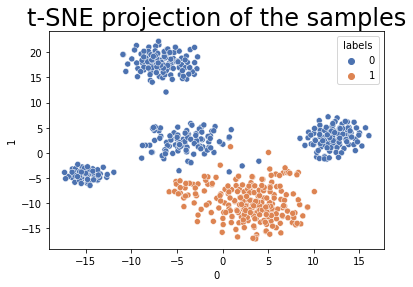

In [75]:
#t-SNE projection plot
sns.scatterplot(data= TSNE_projections, x = TSNE_projections.iloc[:,0] , y = TSNE_projections.iloc[:,1] , hue = 'labels' , palette = 'deep')
plt.title('t-SNE projection of the samples' , fontsize = 24)
plt.show()

## #plotting the pc1 and pc2 & coloring by kMeans clustring algorithm

In [76]:
"""
Unsupervised clustering
"""
from sklearn.cluster import KMeans
cluster_data_scaled = data_scaled.copy()
kmeans = KMeans(n_clusters=5, random_state=0).fit(cluster_data_scaled)

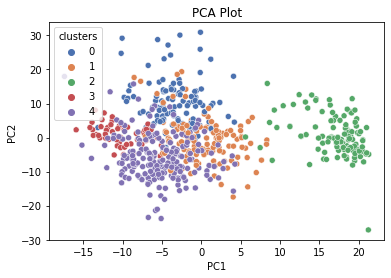

In [77]:
#plotting the pc1 and pc2 & coloring by clusters
X= X.drop(['labels'], axis = 1)
X['clusters'] = kmeans.labels_
sns.scatterplot(data=X,x=X.iloc[:,0],y=X.iloc[:,1], hue = 'clusters', palette = "deep")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Plot")
plt.show()

Plotting UMAP & coloring by kMeans clustring algorithm:

UMAP is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction.

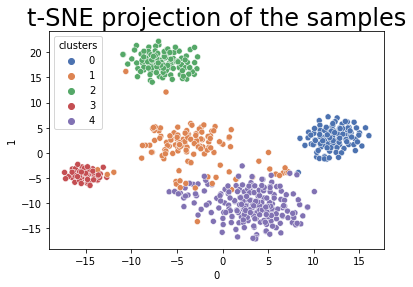

In [78]:
#plotting umap & coloring by clusters
TSNE_projections['clusters'] = kmeans.labels_
sns.scatterplot(data= TSNE_projections, x = TSNE_projections.iloc[:,0] , y = TSNE_projections.iloc[:,1] , hue = 'clusters' , palette = 'deep')
plt.title('t-SNE projection of the samples' , fontsize = 24)
plt.show()